In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance

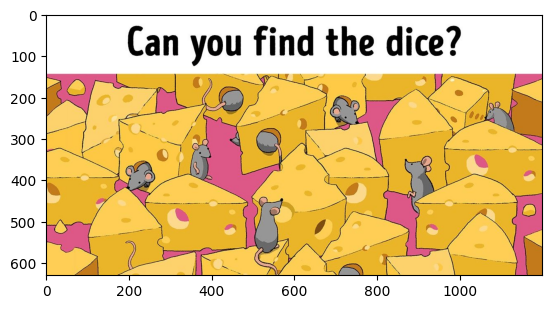

In [2]:
image = cv2.imread('mouse.jpg')
plt.imshow(image[:,:,::-1])

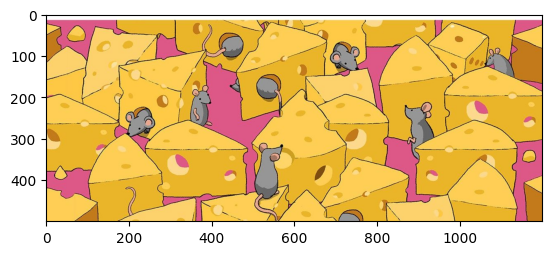

In [3]:
img = image[130:, :]
plt.imshow(img[:,:,::-1])

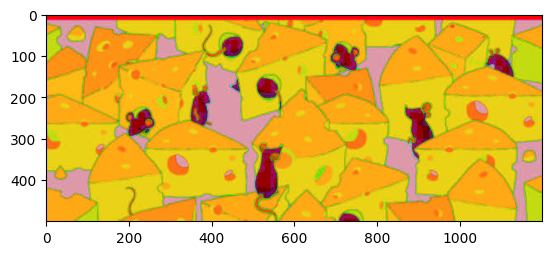

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img[:,:,::-1])

In [5]:
def find_distance(c1, c2):
    rect1 = cv2.boundingRect(c1)
    rect2 = cv2.boundingRect(c2)
    center1 = (rect1[0] + rect1[2] // 2, rect1[1] + rect1[3] // 2)
    center2 = (rect2[0] + rect2[2] // 2, rect2[1] + rect2[3] // 2)
    return distance.euclidean(center1, center2)

In [6]:
def group_area(group):
    total_area = 0
    for contour in group:
        total_area += cv2.contourArea(contour)
    return total_area

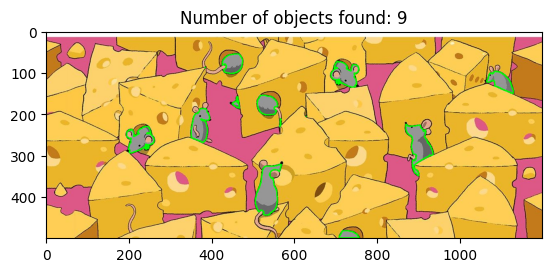

In [7]:
lower_gray = np.array([0, 0, 50])
upper_gray = np.array([180, 50, 200])

mask = cv2.inRange(hsv_img, lower_gray, upper_gray)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

threshold_distance = 75
min_area = 200

groups = []

for contour in contours:
    added_to_group = False
    for group in groups:
        for grouped_contour in group:
            if find_distance(contour, grouped_contour) < threshold_distance:
                group.append(contour)
                added_to_group = True
                break
        if added_to_group:
            break
    if not added_to_group:
        groups.append([contour])

filtered_groups = [group for group in groups if group_area(group) > min_area]

num_objects = len(filtered_groups)

output_img = img.copy()
for group in filtered_groups:
    cv2.drawContours(output_img, group, -1, (0, 255, 0), 2)
plt.title(f'Number of objects found: {num_objects}')
plt.imshow(output_img[:,:,::-1])